In [85]:
import  numpy as np
import pandas as pd

In [86]:
from google.colab import files
uploaded = files.upload()  # Upload your 'adult.csv'

# Read the dataset
dataset = pd.read_csv("adult.csv")
print(dataset.head())

Saving adult.csv to adult (1).csv
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   h

In [87]:
# Dataset Description
print(f"Dataset shape: {dataset.shape}")
print("Class Distribution:\n", dataset['income'].value_counts())

Dataset shape: (48842, 15)
Class Distribution:
 income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [88]:
#checking the dataset
dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [89]:
#finding some important attributes from the dataset like mean,std etc.
dataset.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [90]:
#checking how many null entries are present in each attribute
dataset.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [91]:
#if any null value exists then drop that row
dataset.dropna(inplace=True)

In [92]:
#finding the number of rows and columns in dataset
dataset.shape

(48842, 15)

In [93]:
#checking if the dataset is balanced or not
target_counts=dataset["income"].value_counts(normalize=True)

In [94]:
target_counts

,proportion
income,
<=50K,0.760718
>50K,0.239282


In [95]:
#replacing the undefined values by the mode
dataset.replace("?", pd.NA, inplace=True)
dataset.fillna(dataset.mode().iloc[0], inplace=True)


In [96]:
dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [97]:
# encoding the income by 0 and 1
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['income'] = label_encoder.fit_transform(dataset['income'])

#one hot encoding
dataset = pd.get_dummies(dataset, columns=['workclass', 'education', 'marital-status', 'occupation',
                                           'relationship', 'race', 'gender', 'native-country'], drop_first=True)


In [98]:
dataset

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,0,0,50,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,0,0,40,1,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,7688,0,40,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,0,0,30,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,0,0,40,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,0,0,20,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [99]:
dataset.shape

(48842, 98)

In [100]:
#scaling the numerical values so that one attribute will not dominate
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
dataset[numeric_features] = scaler.fit_transform(dataset[numeric_features])


In [101]:
dataset

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.995129,0.351675,-1.197259,-0.144804,-0.217127,-0.034087,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,-0.046942,-0.945524,-0.419335,-0.144804,-0.217127,0.772930,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,-0.776316,1.394723,0.747550,-0.144804,-0.217127,-0.034087,1,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.390683,-0.277844,-0.030373,0.886874,-0.217127,-0.034087,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,-1.505691,-0.815954,-0.030373,-0.144804,-0.217127,-0.841104,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.849254,0.640492,0.747550,-0.144804,-0.217127,-0.195490,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48838,0.098933,-0.334178,-0.419335,-0.144804,-0.217127,-0.034087,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48839,1.411808,-0.357510,-0.419335,-0.144804,-0.217127,-0.034087,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,-1.213941,0.111984,-0.419335,-0.144804,-0.217127,-1.648120,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [102]:
#Balance the dataset using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

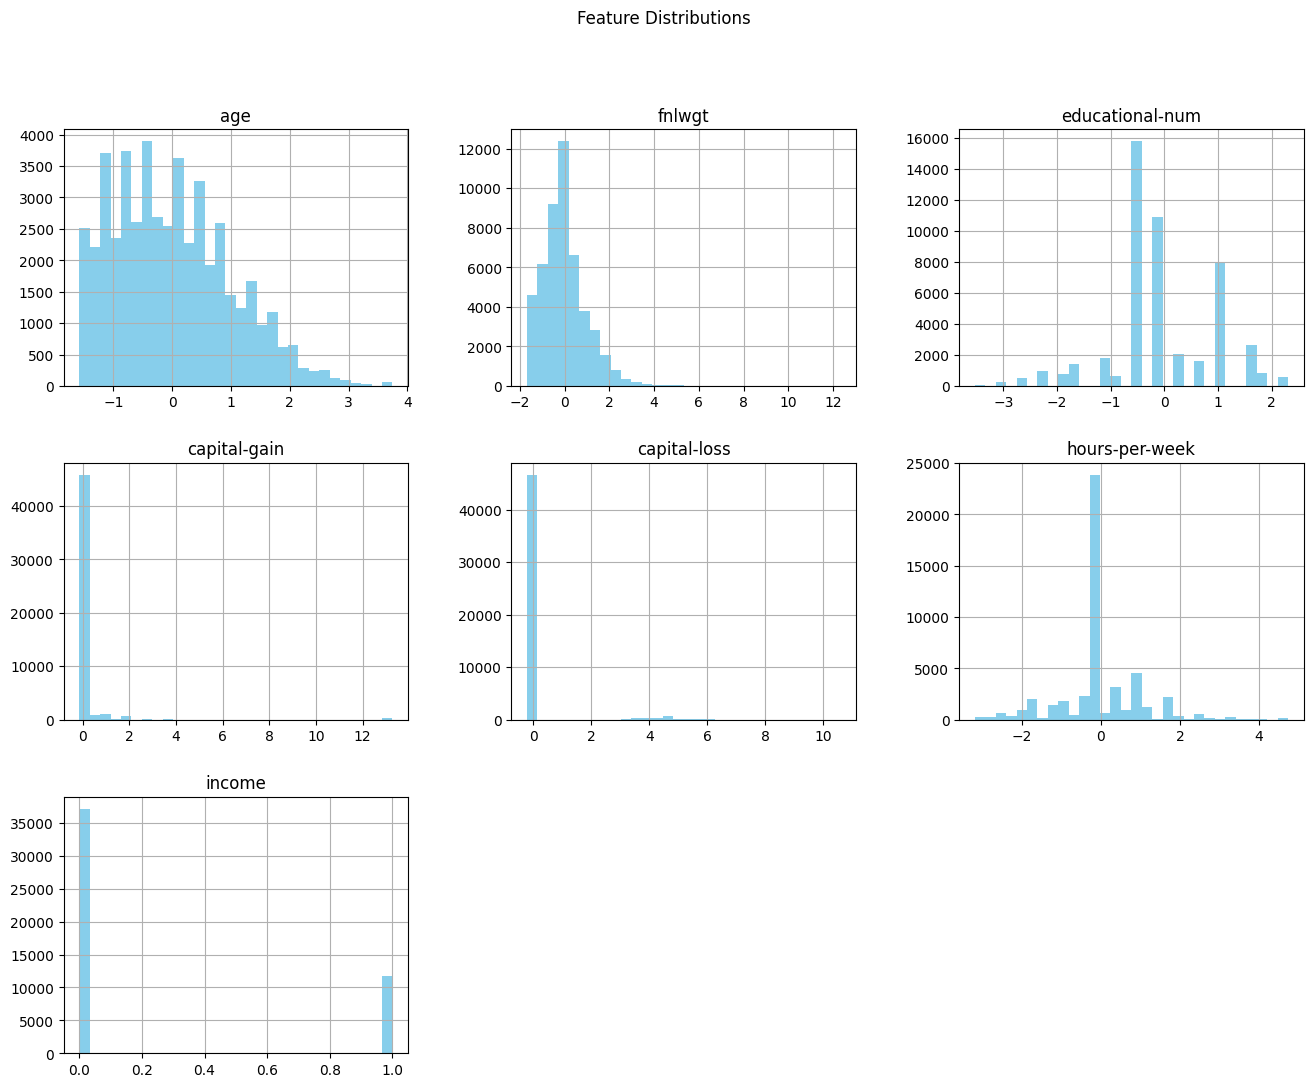

In [103]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
dataset.hist(bins=30, figsize=(16, 12), color='skyblue')
plt.suptitle("Feature Distributions")
plt.show()

Missing values in 'age' column: 0

Basic statistics for 'age':
count    4.884200e+04
mean     2.281092e-16
std      1.000010e+00
min     -1.578629e+00
25%     -7.763164e-01
50%     -1.198790e-01
75%      6.824334e-01
max      3.745808e+00
Name: age, dtype: float64

Basic statistics after cleaning:
count    22604.000000
mean         0.886009
std          0.684796
min          0.025996
25%          0.317746
50%          0.755371
75%          1.338871
max          3.745808
Name: age, dtype: float64


<ipython-input-104-8d87714e39f9>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['age'] = dataset['age'].fillna(dataset['age'].median())


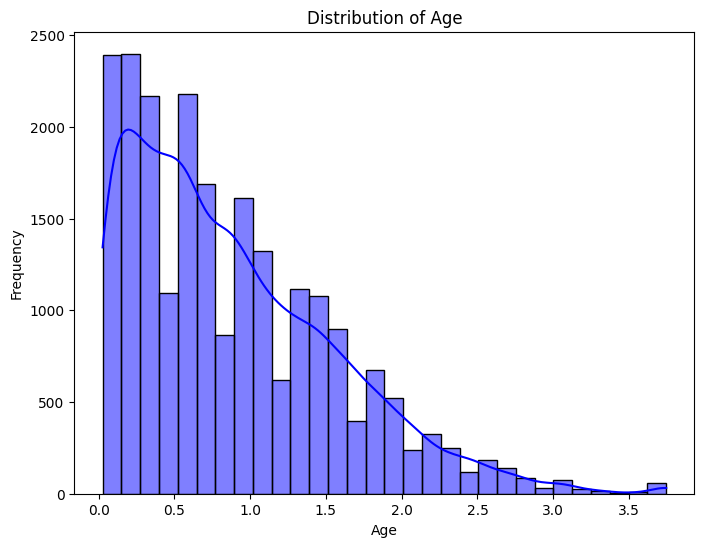

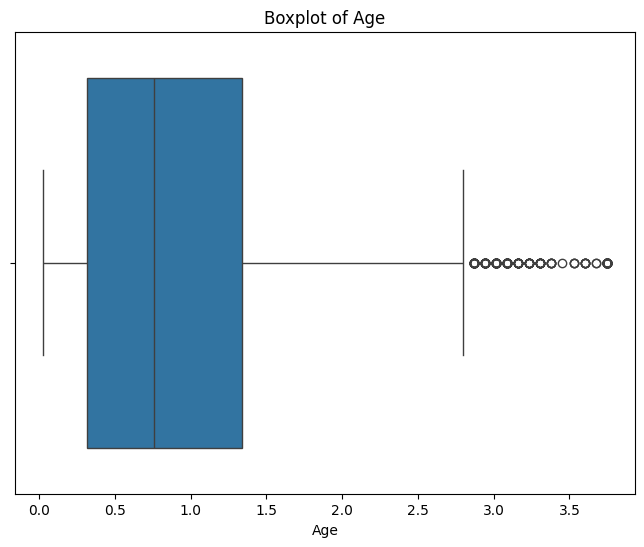

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (assuming your dataframe is already loaded)
# dataset = pd.read_csv('your_dataset.csv')  # Uncomment this and use your actual data loading line

# Clean column names to remove spaces
dataset.columns = dataset.columns.str.strip()

# Check if the 'age' column exists in the DataFrame
if 'age' in dataset.columns:
    # Check for missing values
    missing_values = dataset['age'].isnull().sum()
    print(f"Missing values in 'age' column: {missing_values}")

    # Show basic statistics
    print("\nBasic statistics for 'age':")
    print(dataset['age'].describe())

    # Convert 'age' column to numeric (if not already)
    dataset['age'] = pd.to_numeric(dataset['age'], errors='coerce')  # Converts invalid values to NaN

    # Remove negative 'age' values (if necessary)
    dataset = dataset[dataset['age'] >= 0]

    # Handle missing values by filling with the median (optional)
    dataset['age'] = dataset['age'].fillna(dataset['age'].median())

    # Verify the data after cleaning
    print("\nBasic statistics after cleaning:")
    print(dataset['age'].describe())

    # Visualize the distribution of 'age' (Histogram + KDE)
    plt.figure(figsize=(8, 6))
    sns.histplot(dataset['age'], bins=30, kde=True, color='blue')
    plt.title("Distribution of Age")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()

    # Boxplot to detect outliers in 'age'
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=dataset['age'])
    plt.title("Boxplot of Age")
    plt.xlabel("Age")
    plt.show()

else:
    print("'age' column not found in the dataset.")

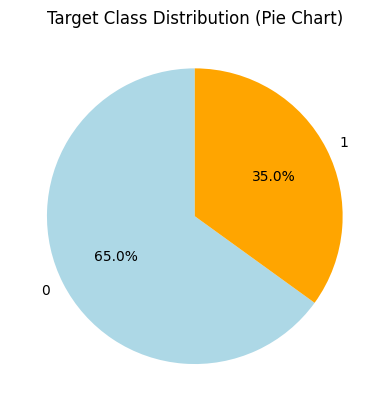

In [105]:
# Plot pie chart for target class distribution
dataset['income'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange'], startangle=90)
plt.title("Target Class Distribution (Pie Chart)")
plt.ylabel("")  # Remove y-axis label
plt.show()


In [106]:
from sklearn.utils import resample

# Upsample minority class
minority_class = dataset[dataset['income'] == 1]
majority_class = dataset[dataset['income'] == 0]

minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
dataset = pd.concat([majority_class, minority_upsampled])


In [107]:
target_counts=dataset["income"].value_counts(normalize=True)
target_counts

,proportion
income,
0,0.5
1,0.5


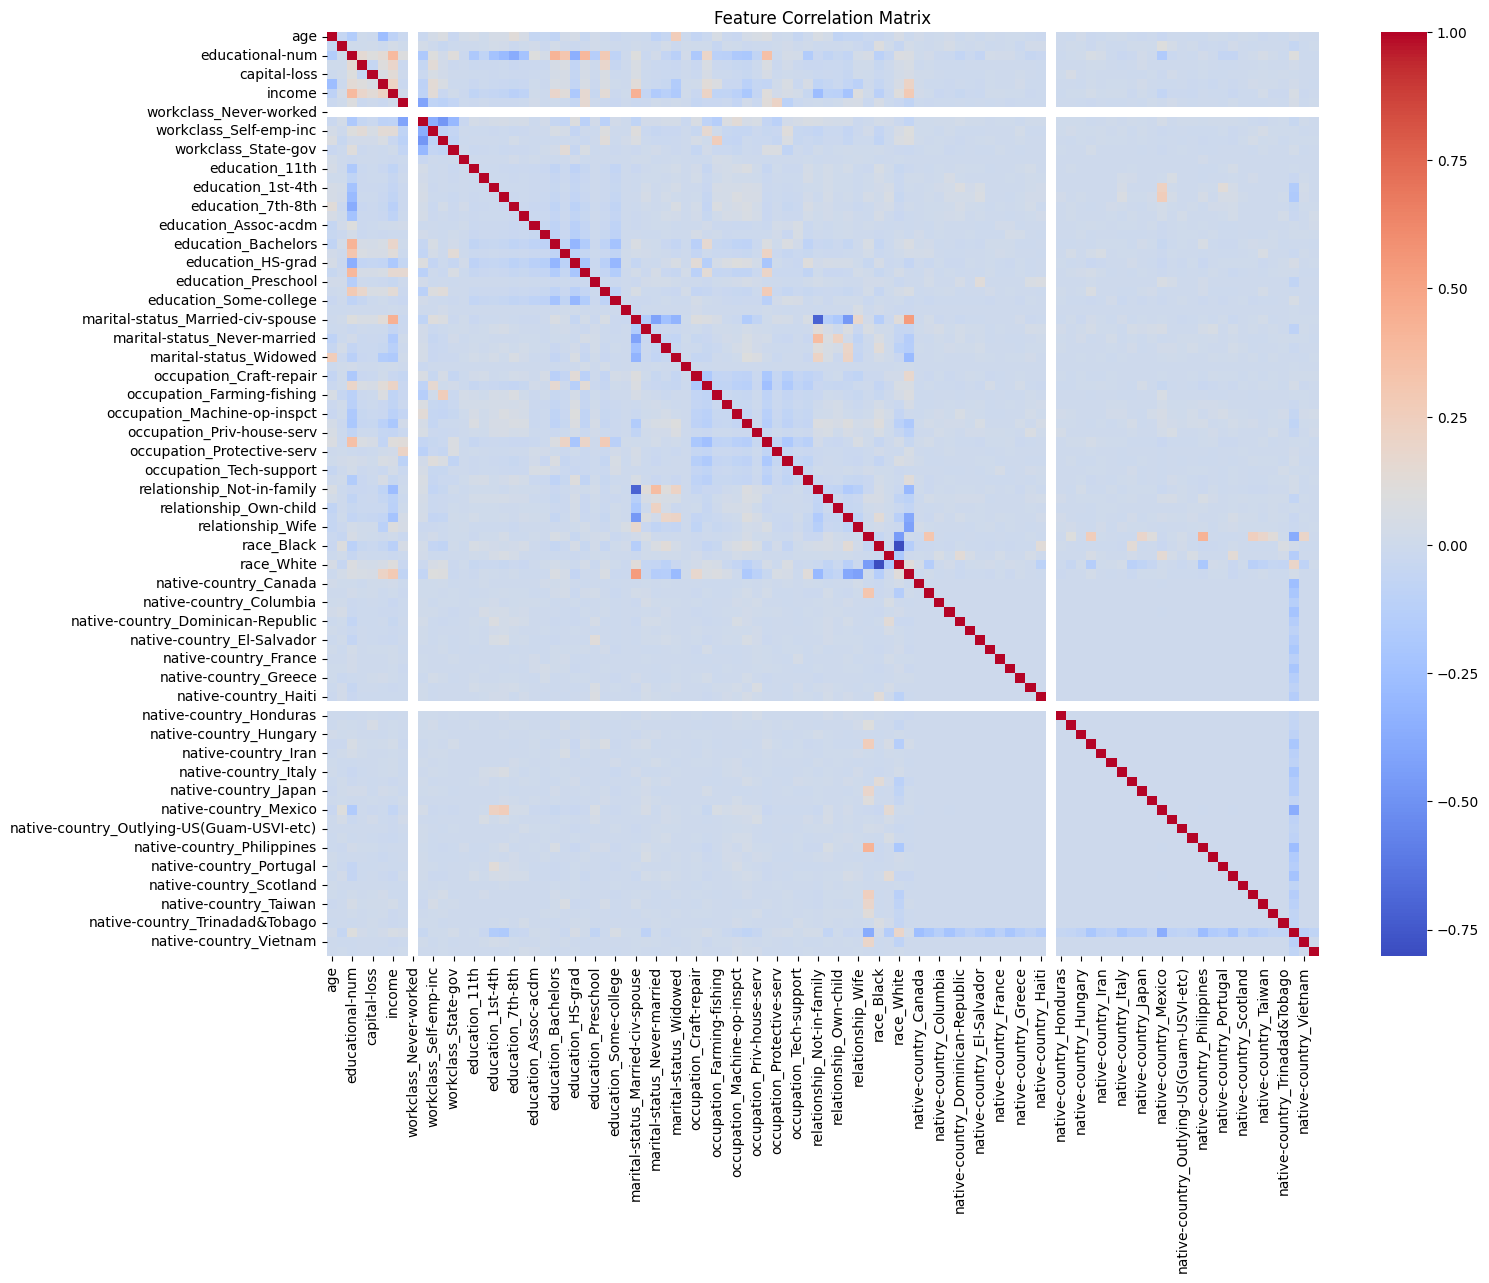

In [108]:
#making co-relation matrix to find out which features are irrelivent
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = dataset.corr()

# Display the correlation matrix as a heatmap for better visualization
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [109]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Separate features and target variable
X = dataset.drop(columns=['income'])  # Adjust 'income' to your target column name
y = dataset['income']

# Standardize features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% of variance
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_reduced = pca.fit_transform(X_scaled)

# Output the reduced feature count
print("Original feature count:", X.shape[1])
print("Reduced feature count:", X_reduced.shape[1])

# If you want to create a DataFrame with the reduced features
X_reduced_df = pd.DataFrame(X_reduced, columns=[f"PC{i+1}" for i in range(X_reduced.shape[1])])

# Combine reduced features with target variable
final_dataset = pd.concat([X_reduced_df, y.reset_index(drop=True)], axis=1)




Original feature count: 97
Reduced feature count: 80


In [110]:
final_dataset.shape

(29402, 81)

In [111]:
final_dataset.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,income
count,2.940200e+04,2.940200e+04,2.940200e+04,2.940200e+04,2.940200e+04,2.940200e+04,2.940200e+04,2.940200e+04,2.940200e+04,2.940200e+04,...,2.940200e+04,2.940200e+04,2.940200e+04,2.940200e+04,2.940200e+04,2.940200e+04,2.940200e+04,2.940200e+04,2.940200e+04,29402.000000
mean,-2.165316e-16,-3.093309e-17,6.186618e-17,-1.623987e-16,3.170642e-16,-6.959945e-17,-1.667487e-16,-2.571313e-16,-1.353323e-16,9.376593e-17,...,1.377489e-17,-7.926604e-17,-7.733272e-18,-6.766613e-17,-3.866636e-18,-9.086595e-17,-1.039158e-17,7.249943e-17,1.348489e-16,0.500000
std,1.846152e+00,1.614693e+00,1.592769e+00,1.369817e+00,1.330820e+00,1.288529e+00,1.261634e+00,1.231996e+00,1.187861e+00,1.163030e+00,...,9.479441e-01,9.438716e-01,9.386365e-01,9.249737e-01,9.164962e-01,9.068107e-01,9.021435e-01,8.837413e-01,8.659131e-01,0.500009
min,-8.409668e+00,-4.704231e+00,-1.012212e+01,-8.297787e+00,-6.240382e+00,-6.353663e+00,-8.949196e+00,-4.694012e+00,-6.534791e+00,-5.294600e+00,...,-5.925560e+00,-8.782460e+00,-7.958243e+00,-1.200093e+01,-1.068741e+01,-8.758884e+00,-5.342790e+00,-8.813489e+00,-4.501663e+00,0.000000
25%,-1.145392e+00,-1.227749e+00,-1.231723e-01,-5.481871e-01,-9.208754e-01,-7.833387e-01,-5.651826e-01,-9.141429e-01,-6.959751e-01,-7.843013e-01,...,-4.287095e-01,-3.035366e-01,-3.589888e-01,-4.755171e-01,-3.575552e-01,-4.303572e-01,-4.864065e-01,-3.201816e-01,-4.403849e-01,0.000000
50%,2.201839e-01,-2.368513e-02,1.560819e-01,7.357323e-02,2.658817e-01,6.849740e-02,2.806759e-02,5.629964e-02,7.764028e-03,-4.923232e-02,...,-2.191673e-03,6.437357e-02,2.880562e-02,-7.704754e-02,-4.634271e-02,-3.928225e-02,1.664995e-02,6.760746e-03,1.812084e-02,0.500000
75%,1.360191e+00,1.065159e+00,6.682686e-01,5.875878e-01,9.807685e-01,7.035261e-01,5.890846e-01,8.653029e-01,6.574005e-01,7.344367e-01,...,4.048283e-01,3.821921e-01,3.935046e-01,3.837230e-01,3.070928e-01,3.996107e-01,4.461904e-01,3.433903e-01,4.333553e-01,1.000000
max,5.027594e+00,6.760579e+00,2.589118e+00,4.507348e+00,4.396968e+00,5.223883e+00,7.276201e+00,4.431846e+00,5.846406e+00,7.097517e+00,...,1.603194e+01,1.051574e+01,6.814677e+00,8.487916e+00,1.301061e+01,7.647124e+00,5.692687e+00,1.180784e+01,6.337053e+00,1.000000


In [112]:
#THIS IS THE FINAL DATASET
final_dataset

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,income
0,-1.304854,-3.270827,0.188240,-0.593008,-0.846264,0.829157,1.404816,1.192286,-0.066455,-1.736746,...,-1.326764,0.152203,-0.725339,-0.191380,-0.214623,0.842269,-0.652462,-0.248848,-1.359552,0
1,0.225872,-0.985678,0.285101,-0.161291,0.084540,1.496423,0.891407,1.338042,-0.257920,0.133154,...,-0.146118,0.071092,0.016081,0.149175,-0.355793,-0.763900,0.817008,0.042345,-0.379306,0
2,-0.637248,-0.695292,0.529778,0.411268,0.042731,2.575603,1.173721,-1.431432,1.633100,1.559327,...,-0.444191,0.334105,0.143554,0.094983,-0.057019,0.444240,0.466002,-0.164753,-0.315316,0
3,-3.004262,-0.182108,1.641489,-2.425608,-1.151849,1.244213,2.162161,1.515517,-0.988868,-2.676320,...,-1.388291,0.288005,-0.831405,-0.100602,-0.512459,0.597599,0.029892,-0.050835,-1.482621,0
4,-0.067774,-2.287581,0.311943,0.516699,0.267687,0.343654,1.121407,0.900727,0.787035,0.683839,...,-0.323885,-0.117768,-0.062291,-0.249633,0.224572,0.137267,0.075071,-0.445313,-0.222732,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29397,-1.218979,0.719339,1.285017,0.385068,1.391748,-1.288055,-0.868522,-0.173483,0.330646,0.702932,...,0.242460,0.728770,0.235976,-0.326986,-0.128290,-0.785002,-0.246561,-0.979415,-2.246742,1
29398,1.110090,-0.528766,0.148069,-0.033552,0.509953,0.698382,0.209604,0.655452,-0.763034,-0.222913,...,0.070619,0.105328,0.188021,-0.302007,0.099595,-0.473326,0.467894,-0.043560,0.593284,1
29399,2.810288,0.410082,-0.308529,-0.388870,1.074659,-0.457492,0.487115,-0.757574,-3.061486,-0.516043,...,0.571663,-0.710762,-0.379347,2.172922,1.673057,3.079476,-0.632895,-2.269751,0.725492,1
29400,0.467820,-1.057988,0.196690,0.982867,1.435248,0.420741,-0.045619,-0.600317,0.278840,-0.290743,...,-1.555220,-1.746657,0.554856,0.610803,0.555080,-0.497118,-0.190490,0.602927,-0.224240,1


In [113]:
#spliting the dataset into traing(80%) and test(20%)
from sklearn.model_selection import train_test_split
X = final_dataset.drop('income', axis=1)
y = final_dataset['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [114]:
X_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80
3693,-1.597018,-0.055332,1.348136,0.503998,1.754700,-2.051754,-0.638270,2.077049,2.285401,1.158101,...,0.728847,-0.134655,-0.477086,-0.685411,0.946341,0.162615,0.668126,0.919695,0.286591,0.398592
8925,0.355129,-0.551968,0.346381,-0.452307,0.160802,1.836577,0.714887,0.728759,-1.049390,-1.244283,...,0.983949,-0.021296,0.278113,-0.167589,0.397305,-0.691126,-0.915022,1.021994,-0.072501,-0.619626
29157,-0.985154,3.311886,0.080951,2.634371,1.119884,-1.849253,-2.551898,1.201212,-0.732622,-1.456397,...,0.715883,0.551656,-0.498504,0.196537,0.421522,0.776272,-0.251799,0.234706,-0.715626,-0.907080
27013,-1.729307,1.470248,1.771084,0.392116,2.579249,-1.696142,-1.002683,0.083942,1.006118,-0.110108,...,0.658166,-1.806207,-0.969956,1.207066,1.004650,0.062308,-0.520707,0.024741,0.343908,-0.960750
12939,-4.054941,-3.777409,-4.200584,-4.382127,1.110383,0.893515,-3.652705,0.984976,-0.072494,-1.427760,...,2.344980,-2.287653,2.870014,0.963436,-0.989828,4.760753,-0.678285,-0.071753,1.883734,-0.521196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,2.077533,0.695430,-0.118269,0.343323,-0.363856,-0.127892,-0.829252,-0.105683,0.625842,-0.361638,...,-0.489138,0.102767,0.363343,-0.912833,-0.854394,0.220495,-0.166089,0.184155,-0.160672,1.128574
5390,-0.072671,-0.958674,0.381763,-0.347250,-0.070155,1.967284,1.201503,1.372170,-0.330657,-0.221877,...,0.574434,-0.166822,0.066545,-0.215722,0.343181,-0.542382,-0.793923,0.909033,-0.116880,-0.924858
860,-3.604291,-0.357704,-0.987792,-3.601587,-0.454690,0.588807,1.144872,-2.803185,-0.382835,0.278369,...,4.598216,-1.367803,2.038256,0.722283,0.458751,0.813021,1.309344,1.976677,-0.347745,0.487205
15795,1.383130,1.264354,0.366952,0.021370,0.425655,2.320567,0.363784,-2.308716,1.390037,-0.097891,...,-0.469248,-0.157748,-0.048434,-0.425308,0.214511,0.564420,0.933339,0.410524,-0.127853,0.053141


In [119]:
# PCA for dimensionality reduction (for visualization)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [118]:
#Random Forest is selected for its ability to handle complex, non-linear relationships and its robustness to overfitting.
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
# Step 10: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [120]:
# Make predictions
y_pred_rf = rf_model.predict(X_test_pca)


In [121]:

# Evaluate the Random Forest model
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.79      0.85      2925
           1       0.82      0.92      0.87      2956

    accuracy                           0.86      5881
   macro avg       0.86      0.86      0.86      5881
weighted avg       0.86      0.86      0.86      5881



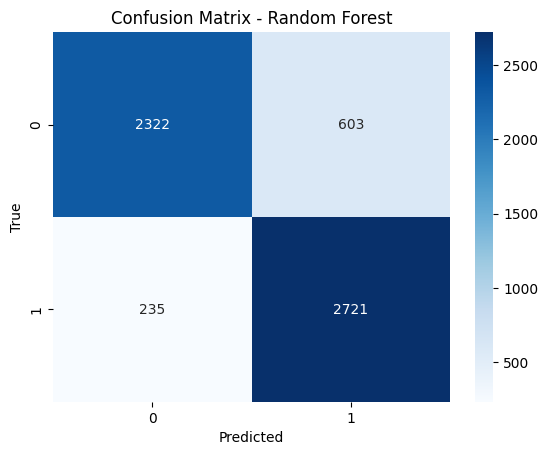

In [122]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [123]:
 #The models are evaluated based on various metrics like precision, recall, F1-score, and accuracy:
# ROC-AUC Score
y_prob_rf = rf_model.predict_proba(X_test_pca)
roc_auc_rf = roc_auc_score(pd.get_dummies(y_test), y_prob_rf, multi_class='ovr')
print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.4f}")

Random Forest ROC-AUC Score: 0.9331


In [124]:
#Logarithmic Loss (Log Loss):Penalizes incorrect predictions with a high confidence level more than incorrect predictions with low confidence.
#It’s particularly useful for evaluating probabilistic classifiers.
from sklearn.metrics import log_loss
logloss = log_loss(y_test, y_prob_rf)
print(f"Logarithmic Loss: {logloss:.4f}")

Logarithmic Loss: 0.4079


In [125]:
#Matthews Correlation Coefficient (MCC):
#A balanced measure even if classes are of different sizes, ranging from -1 (perfect disagreement) to +1 (perfect agreement).
#It's helpful for a binary classification with imbalanced classes.
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred_rf)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Matthews Correlation Coefficient (MCC): 0.7205


In [126]:
#Cohen’s Kappa Score:Measures the agreement between predicted and true values, adjusted for agreement that occurs by chance.
#It's useful for assessing classification performance beyond mere accuracy.
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred_rf)
print(f"Cohen's Kappa Score: {kappa:.4f}")

Cohen's Kappa Score: 0.7148


In [127]:
#Balanced Accuracy:Averages sensitivity (recall for positive class) and specificity, useful for imbalanced datasets.
from sklearn.metrics import balanced_accuracy_score
balanced_acc = balanced_accuracy_score(y_test, y_pred_rf)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Balanced Accuracy: 0.8572


In [128]:
#Specificity (True Negative Rate):Measures the proportion of actual negatives correctly identified. It's useful to understand how well the model avoids false positives.
tn, fp, fn, tp = cm_rf.ravel()
specificity = tn / (tn + fp)
print(f"Specificity (True Negative Rate): {specificity:.4f}")

Specificity (True Negative Rate): 0.7938


In [129]:
# F2-Score:Similar to F1-score but gives more weight to recall than precision. This is useful if false negatives are more costly than false positives.
from sklearn.metrics import fbeta_score
f2_score = fbeta_score(y_test, y_pred_rf, beta=2)
print(f"F2-Score: {f2_score:.4f}")


F2-Score: 0.8981


In [130]:
# Extract probabilities for the positive class (class 1)
y_prob_rf_positive = y_prob_rf[:, 1]  # Take the second column

# Calculate the Brier score
from sklearn.metrics import brier_score_loss

brier_score = brier_score_loss(y_test, y_prob_rf_positive)
print(f"Brier Score: {brier_score:.4f}")

Brier Score: 0.1059


In [131]:
from sklearn.metrics import precision_recall_curve, auc

# Ensure y_prob_rf contains probabilities for both classes
# Extract probabilities for the positive class (class 1)
y_prob_rf_positive = y_prob_rf[:, 1]

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_prob_rf_positive)

# Compute the AUC of the Precision-Recall curve
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

Precision-Recall AUC: 0.9316
